In [1]:
from scipy.sparse import diags #linalg
from scipy.linalg import solve
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def solver(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((2*M+2,N+1))
    S1 = np.zeros((M+1,N+1))
    S12 = np.zeros((M+1,N+1))
    S11 = np.zeros((M+1,N+1))
    S = np.zeros((M+1,N+1))
    C1 = np.zeros((M+1,N+1))
    C12 = np.zeros((M+1,N+1))
    C = np.zeros((M+1,N+1))
    PPX = np.zeros((M+1))
    Em = np.zeros((2*M+2,N+1))
    Ei = np.zeros((M+1,N+1))
    X1 = np.zeros((2*M+2,N+1))
    B = np.zeros((M+1))
    RHS1 = np.zeros((2*M+2))
    S1_lag = np.zeros((M+1,N+1))
    S11 = np.zeros((2*M+2,N+1))
    E_for = np.zeros((M+1,N+1))
    E_alm = np.zeros((M+1,N+1)) 
    
    #initial conditions
    S[0,0] = 1
    C[0,0] = 0
    S1[0,0] = p*h*den*S[0,0]
    C1[0,0] = p*h*den*theta*C[0,0]
    B[0] = S[0,0]  #boundary condition
   
    #lagrangian Step
    S1_lag[0:10,0] = S[0,0]
    X1[:,0] = np.concatenate((S1_lag[:,0],C[:,0]))
    
    #special time step at n=0
    S12[:,1] = (dt/rho2)*(r*C[:,0]-r*S1_lag[:,0])+S1_lag[:,0]
    S11[:,1] = np.concatenate(((rho2/dt)*S12[:,1],np.zeros((M+1))))
    
    U = diags([1], [0,], shape=(M+1, M+1)).toarray()
    X = np.zeros((M+1)**2).reshape(M+1,M+1)
    Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(A*(rho1/dt)+r*p*h)*U]])
    Y2 = np.block([[r*U,-r*U],[X,(A*(rho1/dt))*U]])
    RHS1[:] = Y2.dot(X1[:,0]) + S11[:,1]
    E[:,1] = np.linalg.solve(Y1, RHS1)
    
    S[:,1] =E[0:401,1]
    C[:,1] = E[401:802,1]
    S[0,1] = 1
    
    for n in range(1,N):
        S1_lag[0:10,n] = S[0,0]
        S1_lag[10:M+1,n] = S[1:M-8,n]+((dt-9*dx)/dx)*(S[0:M-9,n]-S[1:M-8,n])
        X1[:,n] =  np.concatenate((S1_lag[:,n],C[:,n]))
        S12[:,n+1] = (dt/rho2)*(r*C[:,n]-r*S1_lag[:,n])+S1_lag[:,n]
        S11[:,n+1] = np.concatenate(((rho2/dt)*S12[:,n+1],np.zeros((M+1))))
        U = diags([1], [0,], shape=(M+1, M+1)).toarray()
        X = np.zeros((M+1)**2).reshape(M+1,M+1)
        Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(A*(rho1/dt)+r*p*h)*U]])
        Y2 = np.block([[r*U,-r*U],[X,(A*(rho1/dt))*U]])
        RHS1[:] = Y2.dot(X1[:,n]) + S11[:,n+1]
        E[:,n+1] = np.linalg.solve(Y1, RHS1)
        
        S[:,n+1] =E[0:401,n+1]
        C[:,n+1] = E[401:802,n+1]   
        S[0,n+1] = 1
        
    return   S, x, t

In [3]:
from scipy.integrate import quad
#Solving for matrices L1, L2, L3
T = 1800
L = 4000
wd = 10         #width
h = 2           #height
fv = 1          #flow velocity
sg = 1          #specific gravity
den = 1000      #density of CIMW and CMW
p = 2*h+wd      #wetted perimeter
theta = 1       #porosity
l = 10          #element distance
Q = 20          #flow rate
K = 0           #dispersion coefficient K=diffusion+dispersitivity*fv
A = wd*h        #Area
r = 1.5
dt = 90        #time step size
dx = 10
w1 = 1          #weight
w2 = 0
N = int(round(T/dt))          #no. of time steps
M = int(round(L/dx))          #no. of nodes

rho1 = p*h*den*theta/A
rho2 = den



(S,x,t) = solver(T,dt)



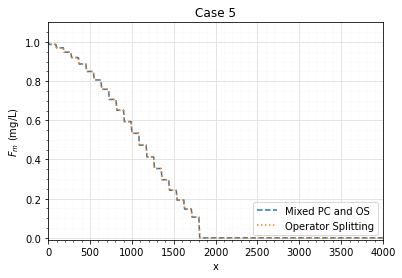

In [4]:
fig, ax = plt.subplots()
ax.axis([-0.1,L+0.1,-0.01,1.1]) 
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.plot(x,S[:,N], "--")
plt.plot(x,S[:,N], ":")
plt.legend(["Mixed PC and OS", "Operator Splitting"], loc ="lower right")
plt.xlabel("x")
plt.ylabel("$F_m$ (mg/L)")
plt.title("Case 5")
plt.savefig('Example 2 Case 5.png')

plt.show()